Done by :

Pawankumar Shyamlal Pal - 213020036

Lakshmi Narayana Jami -213020037



In [ ]:
import pandas as pd  #importing  required libraries pandas sklearn
import numpy as np 
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
data=pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv') #reading the train data 

In [ ]:
data=data.sample(frac=1) #shuffling the train data

In [ ]:
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
269,2.459948,2.580104,0.445207,3.006304,5.834415,0.186538,0.175320,2.099017,0.219544,4.334879,...,0.189867,0.105534,0.167420,0.452533,NaN,0.224162,NaN,1.778176,Control,Saline_C/S
257,2.335802,2.539024,0.424498,2.983150,5.843903,0.203129,0.177391,3.019443,0.243126,4.857976,...,0.106517,0.112802,0.110652,0.523431,NaN,0.136288,NaN,2.051218,Control,Saline_C/S
421,0.283078,0.475838,0.408167,2.643456,5.150053,0.222450,0.163873,5.703905,0.210681,1.215228,...,0.115533,0.139256,0.123424,0.552159,0.210025,0.178660,0.172754,1.200943,Control,Saline_S/C
60,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine_C/S
335,0.308891,0.561607,0.358348,3.038879,5.576901,0.263007,0.205975,4.108062,0.241281,1.283877,...,0.110705,0.142335,0.102678,0.558690,0.107049,0.159183,0.168799,1.246920,Control,Saline_S/C


In [ ]:
data['Genotype'].value_counts() #checking the number of classes in Genotype column 

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

We have 2 classes which have to be classified for "Genotype" and it is unbalanced

In [ ]:
data['Treatment_Behavior'].value_counts() #checking the number of classes in Treatment Behaviour column

Memantine_S/C    225
Memantine_C/S    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64

We have 4 classes which have to be classified for "Treatment_Behavior" and it is unbalanced

In [ ]:
data.dtypes #checking the datatypes of the train data

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object

We need to drop the columns of Genotype and Treatment Behavior

Few columns contain Nan values which can be removed to get a better idea about the usable variables

In [ ]:
data.isnull().sum() #calculating the number of Nan values in each column

DYRK1A_N                0
ITSN1_N                 0
BDNF_N                  0
NR1_N                   0
NR2A_N                  0
                     ... 
EGR1_N                180
H3MeK4_N              180
CaNA_N                  0
Genotype                0
Treatment_Behavior      0
Length: 79, dtype: int64

In [ ]:
data=data.dropna(subset=['H3AcK18_N','EGR1_N','H3MeK4_N'], thresh=2) #dropping the row if the number of Nan is 2 in a row to reduce bias 

In [ ]:
Genotype=data.loc[:,"Genotype"] #saving the Genotype column 
Treatment_Behaviour=data.loc[:,"Treatment_Behavior"] #saving the Treatment_Behaviour column 

In [ ]:
data=data.drop(['Genotype','Treatment_Behavior'],axis=1) #dropping the the two target columns 

In [ ]:
header=list(data.columns) #saving the header of the train data

Performing multi variable imputation for the train data

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data)
# the model learns that the second feature is double the first
data=pd.DataFrame(imp.transform(data),columns=header)


Now the data has been cleaned and our next step should be finding out the usable variables 

Creating a function to drop the feature if correlaiton is greater than the threshold value 

In [ ]:
def correlation(dataset, threshold): # creating function for finding corrleated features by passing dataset and thresshold value
  col_corr=set()                     #collecting correleated columns
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i] 
        col_corr.add(colname) #finding corrleated matrix
  return col_corr

In [ ]:
corr_features = correlation(data,0.8) #calling correlation function with threshold value 0.9
len(set(corr_features)) #no.of corrleated features

25

Thus we can drop 25 features 

In [ ]:
clean_data=data.drop(corr_features,axis=1) #dropping the correlated features 

In [ ]:
clean_data.isnull().sum() #checking if theres any Nan value left 

DYRK1A_N           0
BDNF_N             0
pAKT_N             0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pJNK_N             0
PKCA_N             0
pNR2A_N            0
pRSK_N             0
AKT_N              0
CAMKII_N           0
CREB_N             0
JNK_N              0
MEK_N              0
APP_N              0
SOD1_N             0
MTOR_N             0
P38_N              0
DSCR1_N            0
AMPKA_N            0
pNUMB_N            0
RAPTOR_N           0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
pPKCG_N            0
CDK5_N             0
S6_N               0
ADARB1_N           0
AcetylH3K9_N       0
RRP1_N             0
BAX_N              0
ARC_N              0
ERBB4_N            0
nNOS_N             0
GFAP_N             0
GluR3_N            0
IL1B_N             0
P3525_N            0
pCASP9_N           0
PSD95_N            0
SNCA_N             0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SHH_N              0
BAD_N        

Label encoding the classes of both the columns

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder_geno = preprocessing.LabelEncoder()
label_encoder_treatment  = preprocessing.LabelEncoder() 
# Encode labels in column 'species'.
Genotype= label_encoder_geno.fit_transform(Genotype)
Treatment_Behaviour= label_encoder_treatment.fit_transform(Treatment_Behaviour)

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import ElasticNet #imorting elasticnet model
from sklearn.ensemble import RandomForestClassifier #importing Random forest classifier
from sklearn import svm #importing Support vector classifier
from sklearn.linear_model import LogisticRegression #importing loogistic regression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score #importing metrics
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import RFECV

Creating a function to plot feature importance 

Note : it doesnt work for random forreest 

In [ ]:
def plot_feature_importances(perm_importance_result, feat_name): #function for feature importance
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()[-10:][::-1] #plotting top 10 features using perm_importance
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices]) #labelling y axis with feature names

    plt.xlabel('feature Importance') #labelling X-axis with feature importance
    plt.show()

Creating a dictionary of all hyperparameters, we will find the best hyperparameter by using RamdomizedSearchCV

In [ ]:
model_params = {                       #dictionary of best hyper parameters for each model
    'svm': {                             
        'model': svm.SVC(gamma='auto'),  #support vector classifier hyperparameters
        'params' : {
            'C':np.linspace(1,10,10),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] #finding best kernel
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),  #rfc hyper parameters
        'params' : {
            'n_estimators':np.array([10,20,50]),
            'max_depth': np.array([10,50,100,500])
        }
    },
    'logistic_regression' : {              #elastic net regression hyper parameters
        'model': LogisticRegression(penalty='elasticnet',solver='saga',max_iter=5000),
        'params': {
            'l1_ratio':np.linspace(0,1,num=11)
        }
    },
    'neural_network' :{        #neural network hyper parametrs
        'model' : MLPClassifier(max_iter=2000),
        'params': {
            'hidden_layer_sizes':np.array([100,200,300,500,1000]),
            'learning_rate_init': np.linspace(0.001,0.01,11)
        }
    }
}

### Training

Binary Classification 


Following are the best hyperparameters for the model :  svm
0.9363165266106444
{'kernel': 'linear', 'C': 10.0}

 Top 10 most important features in this model are: 



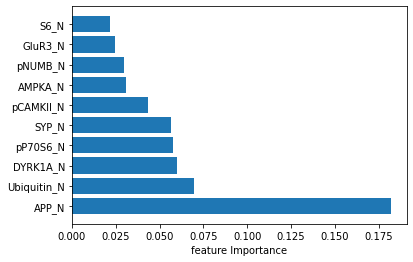


The f1_score after recursive feature elimination is :  0.9631490787269682

Following are the best hyperparameters for the model :  random_forest
0.9832633053221288
{'n_estimators': 50, 'max_depth': 100}

 Top 10 most important features in this model are: 



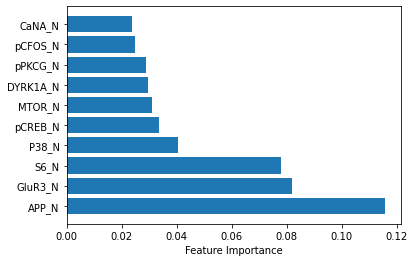


The f1_score after recursive feature elimination is :  1.0

Following are the best hyperparameters for the model :  logistic_regression
0.904467787114846
{'l1_ratio': 1.0}

 Top 10 most important features in this model are: 



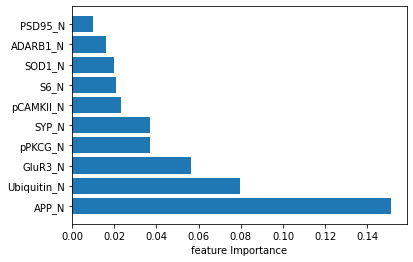


The f1_score after recursive feature elimination is :  0.9195979899497487

Following are the best hyperparameters for the model :  neural_network
0.9983193277310924
{'learning_rate_init': 0.001, 'hidden_layer_sizes': 500}

 Top 10 most important features in this model are: 



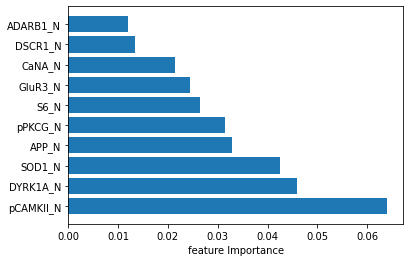

No idea how to implement RFE for neural network


In [ ]:
score0=0
from sklearn import neural_network
for model_name, mp in model_params.items():

  model = RandomizedSearchCV(mp['model'],mp['params'],cv=5,scoring='f1_micro') # model best hyperparameters
  model.out_activation_= 'Softmax' #activating outer layer with soft max function
  model.fit(clean_data,Genotype) #fitting data using   model

  print('\nFollowing are the best hyperparameters for the model : ',model_name) #general statement to prnit model name
  scorek=model.best_score_ 
  print(model.best_score_) #printing model best score
  print(model.best_params_) #printing model best parameters

  print('\n Top 10 most important features in this model are: \n')

  ##saving the best model
  if scorek > score0 :
    best_binary_model = model.best_estimator_ #finding best model
    score0=scorek
  else: 
    pass

  if model_name != 'random_forest': #finding feature importance for rfc using permutation importance
    from sklearn.inspection import permutation_importance
    perm_importance_result_train = permutation_importance(  #normal feature importance attribute not working for Rfc
        model.best_estimator_, clean_data, Genotype)

    plot_feature_importances(perm_importance_result_train, clean_data.columns) #plotting bar charts in rfc for feature importance

  else: 
    arr=model.best_estimator_.feature_importances_ # for remaining three model finding feature importance using attribute feature importance
    index=arr.argsort()[-10:][::-1] #sorting top 10 features in ascending order
    plt.barh(clean_data.columns[index], model.best_estimator_.feature_importances_[index]) #plotting bar charts
    plt.xlabel("Feature Importance")
    plt.show()
#recursive feature elimination
  if model_name == 'neural_network': #for NN model no idea how to RFE
    print("No idea how to implement RFE for neural network")
    continue
  else:   #implementing recursive feature elimination for all other 3 models RFECV
    selector = RFECV(model.best_estimator_, step=10 , cv=5,scoring='f1_micro') #Step =10 means ten features will be dropped after every iteration(recursive featuire elimination)
    selector.fit(clean_data,Genotype) #fitting data after RFECV
    transform=selector.transform(clean_data) #transforming data
    predict=selector.estimator_.predict(transform) #predicting target after transforming data
    print("\nThe f1_score after recursive feature elimination is : ",f1_score(Genotype,predict,average='micro')) #printing f1 score for each model after RFECV


Features like APP_N , S6_N , ERK_N, DYRIKA_N are common in all the models. Feature APP_N seems to be the most important feature for binary classification 

Multi class classification 

In [ ]:
score0=0
for model_name, mp in model_params.items():

  model = RandomizedSearchCV(mp['model'],mp['params'],cv=5,scoring='f1_micro') # model best hyperparameters
  model.out_activation_= 'Softmax' #activating outer layer with soft max function
  model.fit(clean_data,Treatment_Behaviour)  #fitting data using   mode

  print('\nFollowing are the best hyperparameters for the model : ',model_name) #general statement to prnit model name
  scorek=model.best_score_
  print(model.best_score_)  #printing model best score
  print(model.best_params_) #printing model best parameters

  print('\n Top 10 most important features in this model are: \n')

  ##saving the best model
  if scorek > score0 :
    best_mutliclass_model = model.best_estimator_ #finding best model
    score0=scorek
  else: 
    pass

  if model_name != 'random_forest':
    from sklearn.inspection import permutation_importance  #finding feature importance for rfc using permutation importance
    perm_importance_result_train = permutation_importance(
        model.best_estimator_, clean_data, Treatment_Behaviour) #normal feature importance attribute not working for Rfc

    plot_feature_importances(perm_importance_result_train, clean_data.columns) #plotting bar charts in rfc for feature importance

  else: 
    arr=model.best_estimator_.feature_importances_ # for remaining three model finding feature importance using attribute feature importance
    index=arr.argsort()[-10:][::-1]                #sorting top 10 features in ascending order
    plt.barh(clean_data.columns[index], model.best_estimator_.feature_importances_[index]) #plotting bar charts
    plt.xlabel("Feature Importance")
    plt.show()
#recursive feature elimination
  if model_name == 'neural_network': #for NN model no idea how to RFE
    print("No idea how to implement RFE for neural network") 
    continue
  else:  #implementing recursive feature elimination for all other 3 models RFECV
    selector = RFECV(model.best_estimator_, step=10 ,min_features_to_select=10, cv=5,scoring='f1_micro') #Step =2 means two features will be dropped after every iteration
    selector.fit(clean_data,Treatment_Behaviour) #transforming data
    predict=selector.predict(clean_data)#predicting target after transforming data
    print("\nThe f1_score after recursive feature elimination is : ",f1_score(Treatment_Behaviour,predict,average='micro')) #printing f1 score for each model after RFECV

Features like pCAMKII_N, SOD1_N, CaNA_N, NR2A_N are common in all the models. Feature pCAMKII_N seems to be the most important feature for multi class classification 

### **Testing **

In [ ]:
test= pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv') #reading the test data 

In [ ]:
test=test.dropna(subset=['H3AcK18_N','EGR1_N','H3MeK4_N'], thresh=2) #dropping the row if the number of Nan is 2 in a row to reduce bias 

In [ ]:
Genotype_target = label_encoder_geno.transform(test.loc[:,"Genotype"]) #saving the genotype column
Treatment_target = label_encoder_treatment.transform(test.loc[:,"Treatment_Behavior"]) #saving treatment behaviour column
test_data=test.drop(['Genotype','Treatment_Behavior'],axis=1) #dropping the target columns

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(test_data)
# the model learns that the second feature is double the first
final_data=pd.DataFrame(imp.transform(test_data),columns=header)

In [ ]:
final_data= final_data.drop(corr_features,axis=1)  #dropping the correlation features which were also dropped in train data 

In [ ]:
genotype_predict = best_binary_model.predict(final_data) #testing model on test data for binary classification
treatment_predict = best_mutliclass_model.predict(final_data) #testing model on test data for multi class data

In [ ]:
f1_score(Genotype_target,genotype_predict,average='micro') #based upon test data finding f1 score for binary class

In [ ]:
f1_score(Treatment_target,treatment_predict,average='micro') #based upon test data finding f1 score for multi class data

## observations, thoughts and references

**For Binary class Data**
On comparing F1 score after recursive feature elimination
Random Forest > SV classifier > Elastic Net ------(may be neural networks between RF and SVC)    


On comapring F1 score before recursive feature elimination is NeuralNetworks>Randomforest>Support vector>elasticnet



**For Multiclass data**

On comapring F1 score after recursive feature elimination is 
Random Forest > SV classifier > Elastic Net ------(may be neural networks between RF and SVC)

On comapring F1 score before recursive feature elimination is
NeuralNetworks>Randomforest>Support vector>elasticnet

overall Elasticnet or Lasso can be considered as less accurate model On comparing with other models Neural Networks and RandomForest are more accurate
and SVC is also accurate one.

After Recursive feature elimination The accuray of all models are increased slightly

Feature selection plays very key role in  maintainig accuracy of model

For binary class the best model(Random Forest) gives R2 score of 0.87 on test data

For multiclass data best model gives R2 score of 0.71 on test data so the models  for Multiclass data are less accurate when compare with Binary classifiers.

Feature Importance : 

---


Binary 

---

Features like APP_N , S6_N are common in all the models. Feature APP_N seems to be the most important feature for binary classification.




---
Multi class 

---

Features like pCAMKII_N, SOD1_N, CaNA_N, NR2A_N are common in all the models. Feature pCAMKII_N seems to be the most important feature for multi class classification 






After performing recusive feature elimination, it was observed that there was some significant increments in the f1 score for all models.



References 
https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb

https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14 as reference for exploratory analysis

https://www.youtube.com/watch?v=FndwYNcVe0U

https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

Disucssed with : Parth Rakesh Brahmbhatt 213020067